## Cleaning & Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
wfa_df = pd.read_csv('../data_raw/Work_From_Anywhere_Salary_Data.csv')
wfa_df.head()

,Company,Job Title,Industry,Location,Employment Type,Experience Level,Remote Flexibility,Salary (Annual),Currency,Years of Experience,Job Satisfaction Score (1-10),Tech Stack,Perks,Last Promotion (Years Ago)
0,Microsoft,Data Analyst,Media,Austin,Part-time,Mid,Remote,155200.11,AUD,1.3,7,"Python, SQL",Stock Options,0.47
1,Apple,Data Scientist,Retail,San Francisco,Part-time,Lead,Remote,106365.54,INR,12.1,1,"JavaScript, React",Gym Membership,1.70
2,Amazon,Software Engineer,Healthcare,San Francisco,Full-time,Lead,Remote,91026.49,INR,9.1,1,"C#, .NET",Gym Membership,2.68
3,Tesla,Data Analyst,Retail,Austin,Contract,Mid,Onsite,41824.38,EUR,11.6,2,"JavaScript, React",Stock Options,1.90
4,Adobe,DevOps Engineer,Healthcare,New York,Contract,Senior,Remote,143929.78,USD,9.1,3,"Go, Kubernetes",Health Insurance,0.82


In [4]:
wfa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company                        500 non-null    object 
 1   Job Title                      500 non-null    object 
 2   Industry                       500 non-null    object 
 3   Location                       500 non-null    object 
 4   Employment Type                500 non-null    object 
 5   Experience Level               500 non-null    object 
 6   Remote Flexibility             500 non-null    object 
 7   Salary (Annual)                500 non-null    float64
 8   Currency                       500 non-null    object 
 9   Years of Experience            500 non-null    float64
 10  Job Satisfaction Score (1-10)  500 non-null    int64  
 11  Tech Stack                     500 non-null    object 
 12  Perks                          500 non-null    obj

In [5]:
# mencari null atau missing value
wfa_df.isnull().sum()

Company                          0
Job Title                        0
Industry                         0
Location                         0
Employment Type                  0
Experience Level                 0
Remote Flexibility               0
Salary (Annual)                  0
Currency                         0
Years of Experience              0
Job Satisfaction Score (1-10)    0
Tech Stack                       0
Perks                            0
Last Promotion (Years Ago)       0
dtype: int64

## Mencari Jumlah dan Kategori Data

In [6]:
wfa_df['Job Title'].value_counts().head(10)

Job Title
UX Designer          92
DevOps Engineer      88
Data Analyst         87
Product Manager      85
Software Engineer    76
Data Scientist       72
Name: count, dtype: int64

#### Jumlah tipe employment

In [7]:
type_employment = wfa_df['Employment Type'].value_counts()
type_employment

Employment Type
Contract      127
Part-time     126
Full-time     124
Internship    123
Name: count, dtype: int64

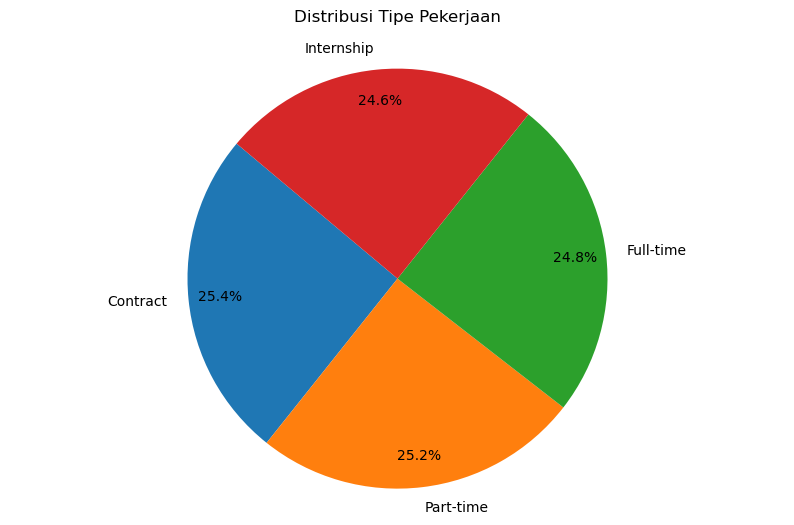

In [18]:
# Visualisasi distribusi tipe pekerjaaan (Pie Chart)

tipe_pekerjaan = wfa_df['Employment Type'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(tipe_pekerjaan,
        labels=tipe_pekerjaan.index,
        autopct='%1.1f%%', 
        startangle=140,  
        pctdistance=0.85)  
plt.title('Distribusi Tipe Pekerjaan\n')
plt.axis('equal')  
plt.show()

In [19]:
## Mencari Total Pekerjaan (Employment Type)
total_jobs = wfa_df['Employment Type'].value_counts().sum()
print(f"Total Pekerjaan: {total_jobs}")

Total Pekerjaan: 500


#### Mencari perusahaan apa saja yang ada dalam data

In [8]:
wfa_df['Company'].value_counts().head(15)

Company
IBM           58
Meta          55
Tesla         54
Adobe         52
Salesforce    52
Amazon        50
Apple         49
Netflix       49
Microsoft     41
Google        40
Name: count, dtype: int64

### Kategori Jenis Employment bedasarkan Perusahaan

In [9]:
## Mencari jumlah "Contract" pada setiap perusahaan

Contract_Etype = wfa_df[wfa_df['Employment Type'] == 'Contract']['Company'].value_counts()
Contract_Etype



Company
Tesla         21
Netflix       16
Meta          15
Adobe         13
Salesforce    12
Amazon        12
Apple         11
Microsoft     11
Google         8
IBM            8
Name: count, dtype: int64

In [10]:
## Mencari "Part-Time" pada setiap perusahaan

Part_Time_Etype = wfa_df[wfa_df['Employment Type'] == 'Part-time' ]['Company'].value_counts()
Part_Time_Etype

Company
IBM           21
Adobe         16
Meta          15
Salesforce    14
Apple         13
Tesla         12
Netflix       10
Amazon        10
Microsoft      8
Google         7
Name: count, dtype: int64

In [11]:
## Mencari "Full-Time" pada setiap perusahaan

full_time_etype = wfa_df[wfa_df['Employment Type'] == 'Full-time']['Company'].value_counts()
full_time_etype

Company
Amazon        16
Google        16
Salesforce    13
IBM           13
Adobe         12
Apple         12
Tesla         11
Meta          11
Netflix       10
Microsoft     10
Name: count, dtype: int64

In [12]:
## Mencari "Internship" pada setiap perusahaan

internship_etype = wfa_df[wfa_df['Employment Type'] == 'Internship']['Company'].value_counts()
internship_etype

Company
IBM           16
Meta          14
Salesforce    13
Apple         13
Netflix       13
Amazon        12
Microsoft     12
Adobe         11
Tesla         10
Google         9
Name: count, dtype: int64

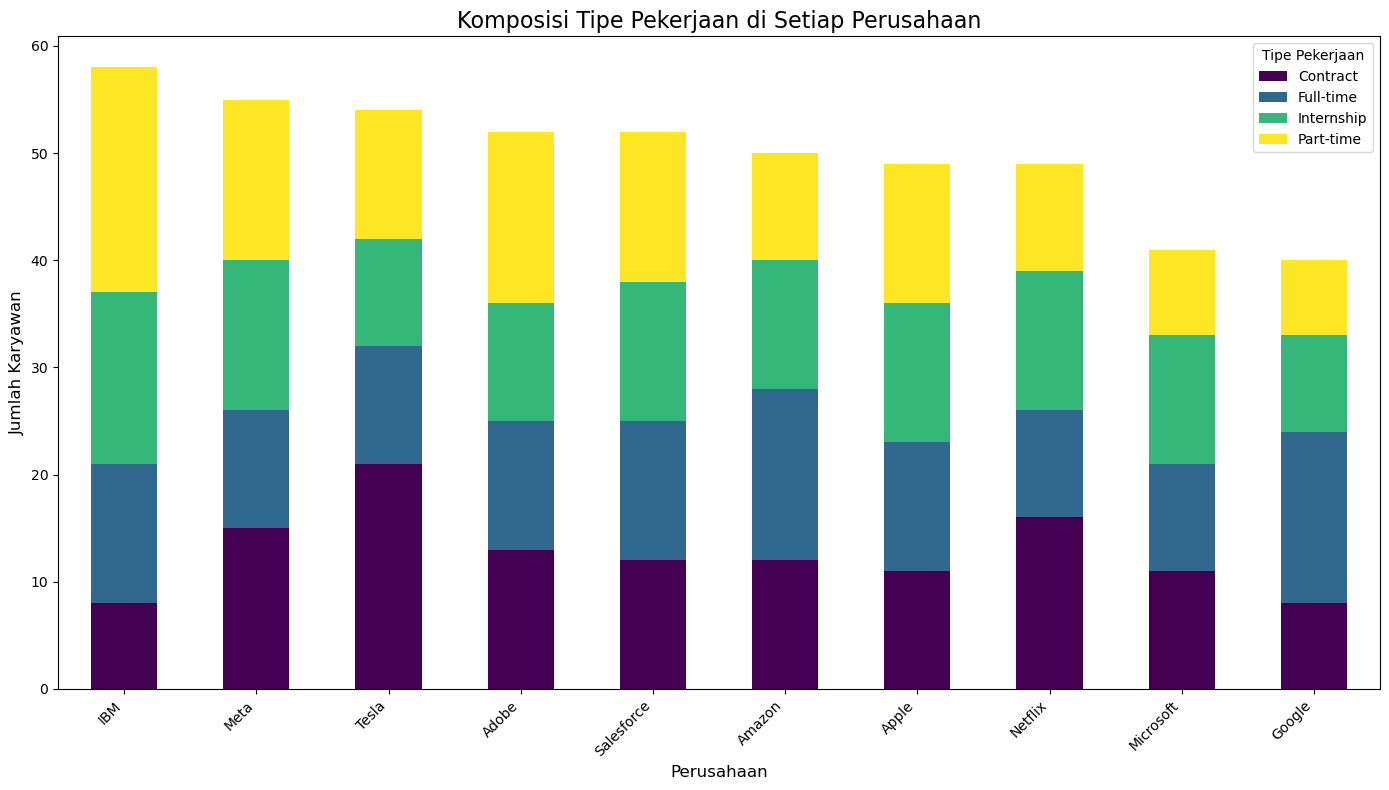

In [ ]:
### Visualisasi Mencari distribusi "Employment Type" pada setiap perusahaan

employment_counts = wfa_df.groupby(['Company', 'Employment Type']).size().unstack(fill_value=0)

employment_counts['Total'] = employment_counts.sum(axis=1)

plot_data = employment_counts.sort_values('Total', ascending=False).drop('Total', axis=1)

plot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    colormap='viridis',  
)

plt.title('Komposisi Tipe Pekerjaan di Setiap Perusahaan', fontsize=16)
plt.xlabel('Perusahaan', fontsize=12)
plt.ylabel('Jumlah Karyawan', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipe Pekerjaan')
plt.tight_layout()

plt.show()

## Mencari 5 Pekerjaan dengan gaji tertinggi groupby experince

In [38]:
## Mencari 5 Pekerjaan dengan gaji tertinggi groupby experince

top5_jobs_sorted = wfa_df.sort_values(by='Salary (Annual)', ascending=False)
byExperience = top5_jobs_sorted.groupby('Experience Level').head(5)

# urut bedasarkan 'Experience Level' dan 'Salary (Annual)'
final_output = byExperience.sort_values(
    by=['Experience Level', 'Salary (Annual)'], 
    ascending=[True, False]
    )

print(final_output[['Experience Level', 'Job Title', 'Salary (Annual)', 'Company']])


    Experience Level          Job Title  Salary (Annual)     Company
180            Entry    Product Manager        199927.24     Netflix
340            Entry    Product Manager        196700.26  Salesforce
172            Entry        UX Designer        196343.42  Salesforce
159            Entry       Data Analyst        196244.82       Adobe
138            Entry     Data Scientist        195304.55       Adobe
18              Lead  Software Engineer        197502.50       Adobe
365             Lead        UX Designer        197347.10     Netflix
313             Lead       Data Analyst        196515.13      Amazon
129             Lead        UX Designer        195533.01     Netflix
92              Lead     Data Scientist        193884.45       Apple
492              Mid    Product Manager        197722.60        Meta
28               Mid     Data Scientist        195955.03     Netflix
319              Mid  Software Engineer        193929.27       Adobe
161              Mid       Data An

### Mencari rata-rata gaji (Job Title) bedasarkan Experience


In [39]:
avg_salary = wfa_df.groupby(['Job Title', 'Experience Level'])['Salary (Annual)'].mean().reset_index()
avg_salary = avg_salary.rename(columns={'Salary (Annual)': 'Average Salary'})

srtd_avg_salary = avg_salary.sort_values(
    by=['Experience Level', 'Average Salary'], 
    ascending=[True, False]
)

print(srtd_avg_salary)

            Job Title Experience Level  Average Salary
12    Product Manager            Entry   132786.601538
8     DevOps Engineer            Entry   125077.612500
0        Data Analyst            Entry   120983.970526
4      Data Scientist            Entry   120353.970000
20        UX Designer            Entry   115517.116522
16  Software Engineer            Entry   115003.355714
17  Software Engineer             Lead   126566.571304
1        Data Analyst             Lead   117892.511818
5      Data Scientist             Lead   115426.070400
13    Product Manager             Lead   112964.760455
21        UX Designer             Lead   107435.721600
9     DevOps Engineer             Lead   106372.390455
22        UX Designer              Mid   125433.132500
14    Product Manager              Mid   116056.714000
18  Software Engineer              Mid   112558.589474
6      Data Scientist              Mid   111154.639091
2        Data Analyst              Mid   108998.747742
10    DevO

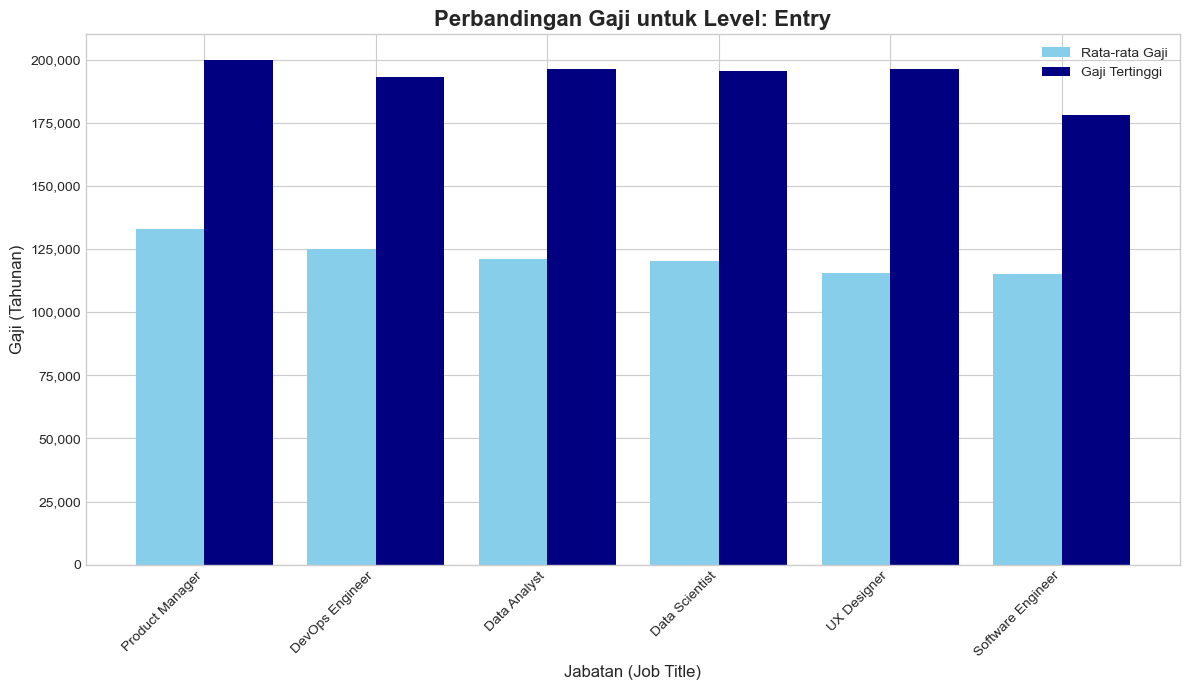

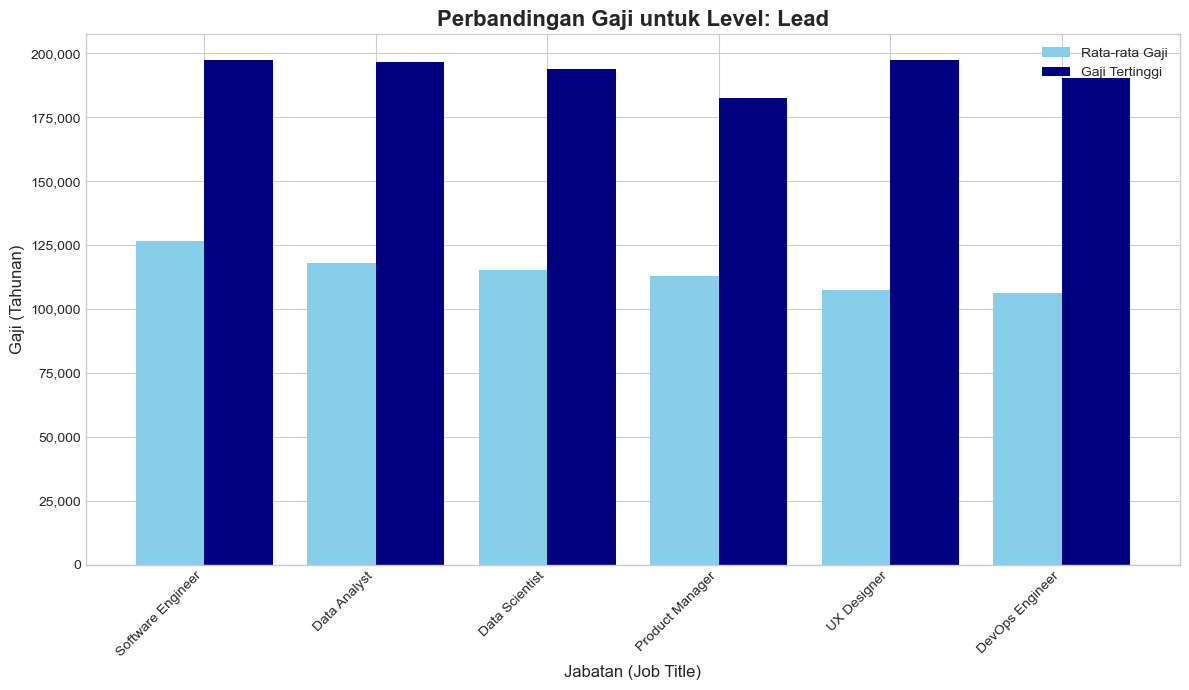

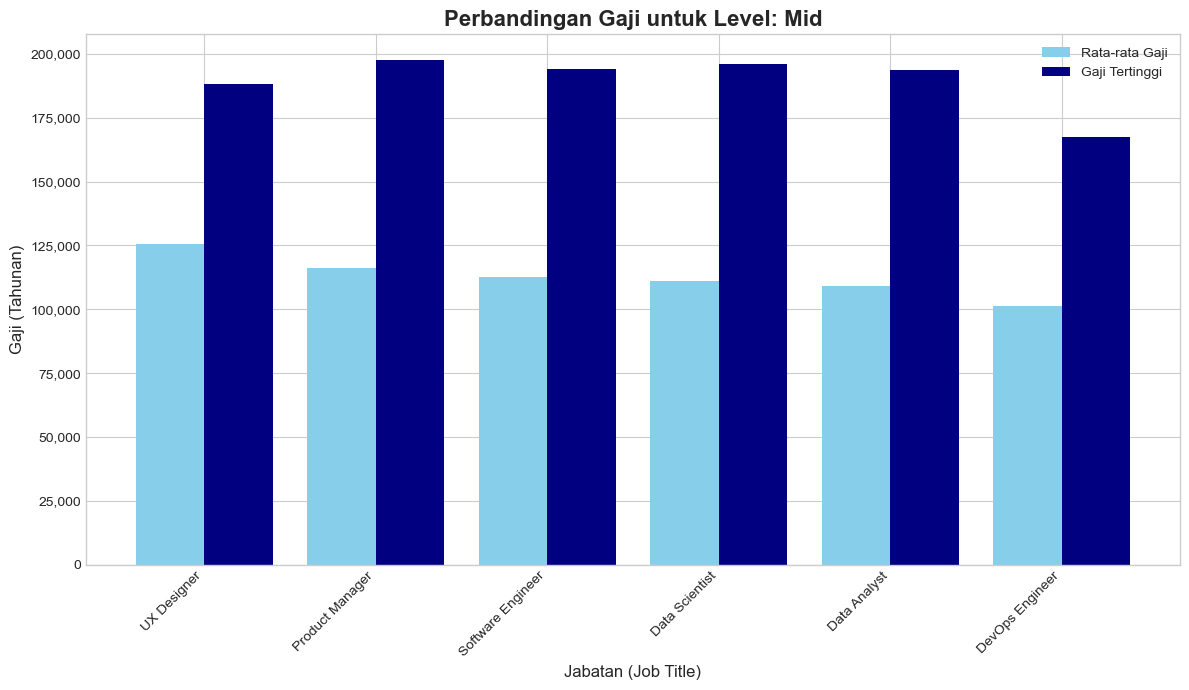

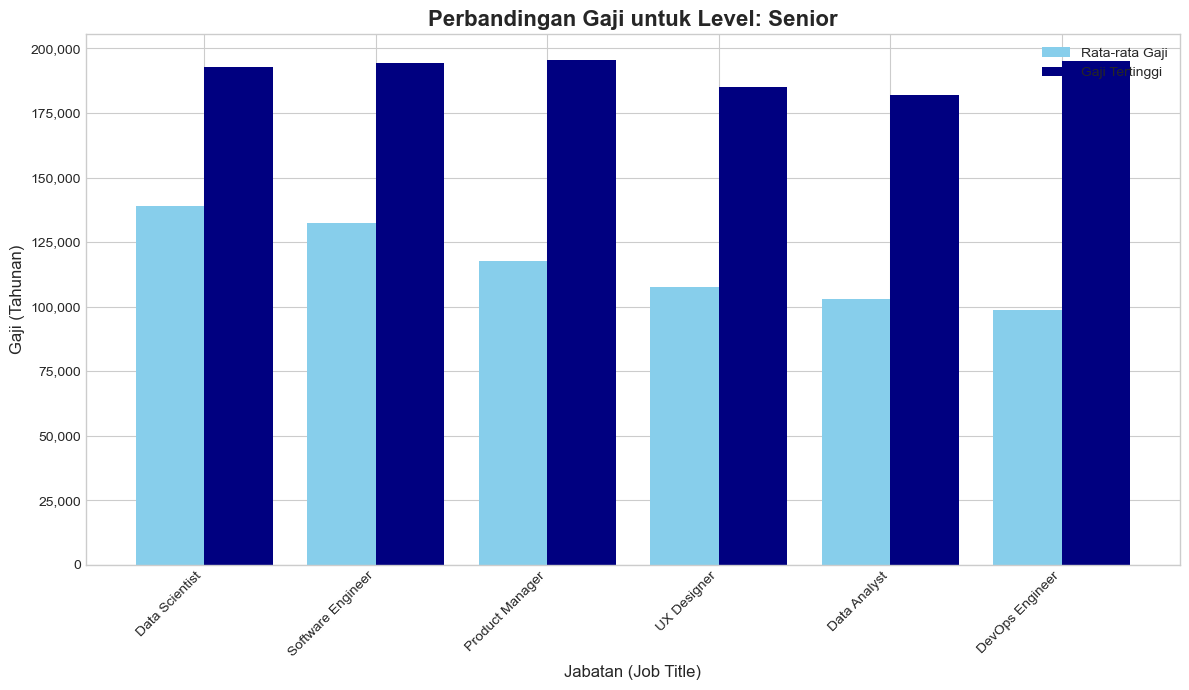

In [41]:
salary_analysis = wfa_df.groupby(['Experience Level', 'Job Title'])['Salary (Annual)'].agg(['mean', 'max']).reset_index()

salary_analysis.rename(columns={'mean': 'Rata-rata Gaji', 'max': 'Gaji Tertinggi'}, inplace=True)

experience_levels = salary_analysis['Experience Level'].unique()

for level in experience_levels:
    # Filter data untuk level saat ini
    level_data = salary_analysis[salary_analysis['Experience Level'] == level].copy()
    
    # Urutkan data berdasarkan rata-rata gaji untuk tampilan grafik yang lebih baik
    level_data.sort_values('Rata-rata Gaji', ascending=False, inplace=True)
    
    # Pengaturan untuk plot
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Menentukan posisi bar
    x = np.arange(len(level_data['Job Title']))
    width = 0.4  # Lebar bar
    
    # Membuat bar untuk Rata-rata Gaji dan Gaji Tertinggi
    rects1 = ax.bar(x - width/2, level_data['Rata-rata Gaji'], width, label='Rata-rata Gaji', color='skyblue')
    rects2 = ax.bar(x + width/2, level_data['Gaji Tertinggi'], width, label='Gaji Tertinggi', color='navy')
    
    # Menambahkan Judul dan Label
    ax.set_title(f'Perbandingan Gaji untuk Level: {level}', fontsize=16, fontweight='bold')
    ax.set_ylabel('Gaji (Tahunan)', fontsize=12)
    ax.set_xlabel('Jabatan (Job Title)', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(level_data['Job Title'], rotation=45, ha="right")
    
    # Menambahkan format angka pada sumbu Y agar lebih mudah dibaca
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ',')))
    
    ax.legend()
    
    fig.tight_layout()
    plt.show()


### Analisa Gaji bedasarkan Experience

In [42]:
analytic =  wfa_df.groupby(['Experience Level', 'Job Title'])['Salary (Annual)'].describe()
print(analytic)

                                    count           mean           std  \
Experience Level Job Title                                               
Entry            Data Analyst        19.0  120983.970526  59462.233853   
                 Data Scientist      15.0  120353.970000  42714.236776   
                 DevOps Engineer     24.0  125077.612500  46971.172580   
                 Product Manager     26.0  132786.601538  48749.544449   
                 Software Engineer   21.0  115003.355714  40623.003972   
                 UX Designer         23.0  115517.116522  43573.477889   
Lead             Data Analyst        22.0  117892.511818  49169.616528   
                 Data Scientist      25.0  115426.070400  46040.141500   
                 DevOps Engineer     22.0  106372.390455  51590.661043   
                 Product Manager     22.0  112964.760455  47042.340925   
                 Software Engineer   23.0  126566.571304  43951.283048   
                 UX Designer         2